In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Read data file using Pandas  
sl=pd.read_csv('Salary_Data.csv')

In [5]:
sl.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# Analysis the Correlation in the feature space.
corr=sl.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(2)

,YearsExperience,Salary
YearsExperience,1,0.98
Salary,0.98,1


In [8]:
# using isnull() function for finding null values   
print(mu_data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


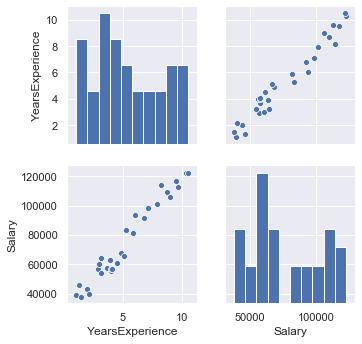

In [11]:
# Create the default pairplot
sns.set(rc={'figure.figsize':(7,5)})
sns.pairplot(sl)

Text(0.5, 0, 'Salary')

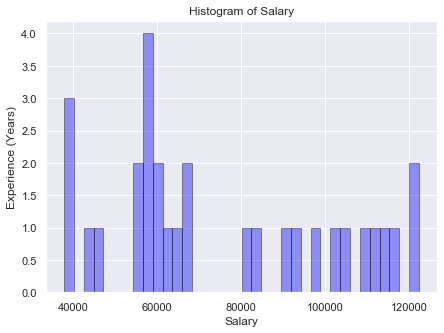

In [15]:
# seaborn histogram
sns.distplot(sl ['Salary'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Salary')
plt.ylabel('Experience (Years)')
plt.xlabel('Salary')

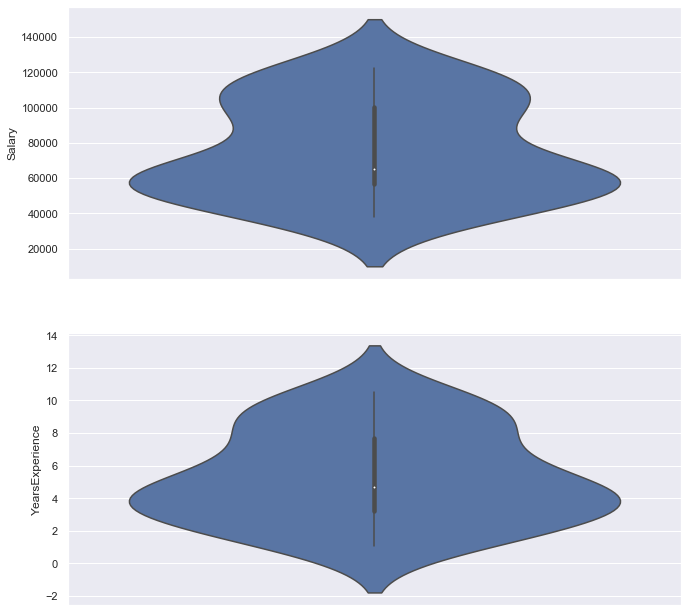

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize =(11, 11))
sns.violinplot( ax = ax1, y = sl["Salary"] ) 
sns.violinplot( ax = ax2, y = sl["YearsExperience"])

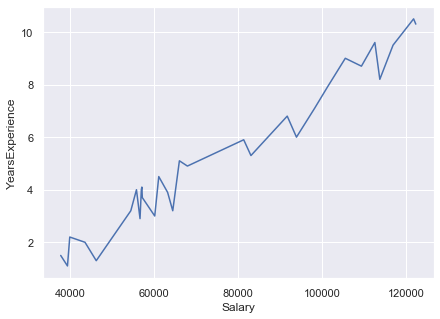

In [34]:
# Draw line plot
sns.lineplot(x = "Salary", y = "YearsExperience", data=sl,)
plt.show()

In [36]:
#scaling the variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(sl)
x=pd.DataFrame(x,columns=sl.columns)

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Split data into train and test 
X = x.iloc[:, :-1].values
y = x.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [74]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#To retrieve the intercept:
print("Linear Regression Intercept: ", reg.intercept_)
#For retrieving the slope:
print("Linear Regression coefficient: ", reg.coef_)

Linear Regression Intercept:  -0.0171742021938715
Linear Regression coefficient:  [0.96676348]


In [83]:
y_pred = reg.predict(X_test)
r2_scr=r2_score(y_test,y_pred)
print("r2 score: ",r2_scr)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.9414466227178215
Mean Absolute Error: 0.1914890437014035
Mean Squared Error: 0.05200922348642689
Root Mean Squared Error: 0.22805530795494958


In [84]:
sf_reg = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
sf_reg

,Actual,Predicted
0,1.359074,1.468099
1,-0.299217,-0.160389
2,1.402741,0.983017
3,0.262859,-0.021794
4,-0.428810,-0.749416
5,-0.698013,-0.576173
6,1.721028,1.710640
7,1.240203,1.156261
8,-0.706620,-0.472227


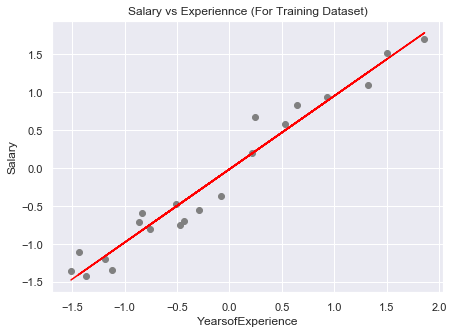

In [72]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, reg.predict(X_train), color = 'red')
plt.title('Salary vs Experiennce (For Training Dataset)')
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
plt.show()

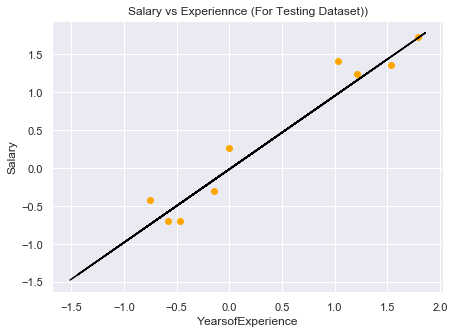

In [71]:
plt.scatter(X_test, y_test, color = 'orange')
plt.plot(X_train, reg.predict(X_train), color = 'black')
plt.title('Salary vs Experiennce (For Testing Dataset))')
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring="r2")
a_score

array([ 0.3595933 , -1.24422823,  0.25052696,  0.29699762,  0.07028896])

In [ ]:
from sklearn.externals import joblib 
joblib.dump(reg, 'b_reg.pkl')